Test points and predictions:
Point [1 1] -> Class 0
Point [5 5] -> Class 1
Point [4 4] -> Class 0
Point [7 3] -> Class 1

Accuracy on test set: 0.75


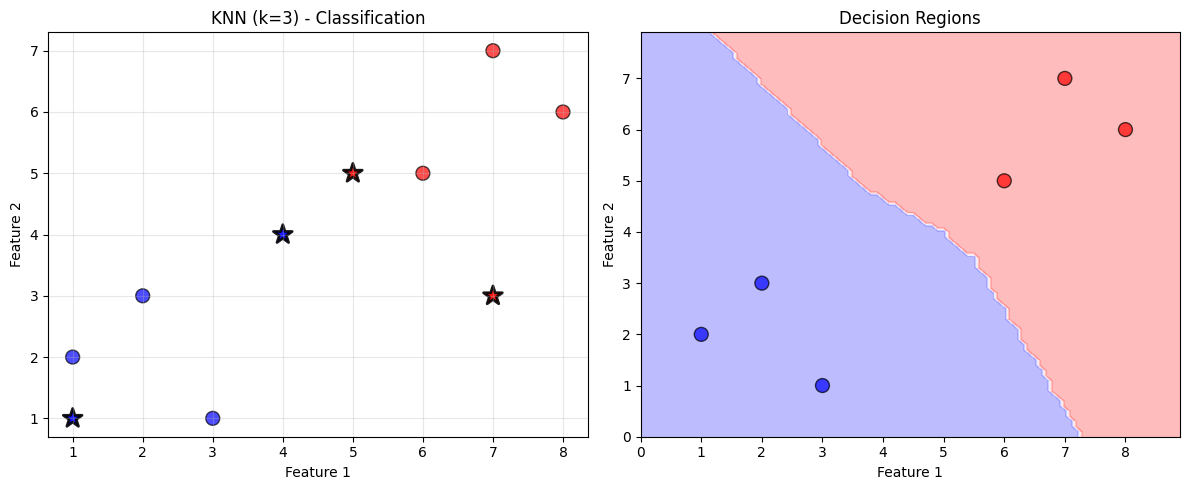

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

class KNN:
    def __init__(self, k: int = 3):
        self.k = k
        self.X_train: np.ndarray = None
        self.y_train: np.ndarray = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        self.X_train = X
        self.y_train = y
        return self

    def predict(self, X: np.ndarray):
        return np.array([self._predict_one(x) for x in X])

    def _predict_one(self, x: np.ndarray):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_labels = self.y_train[k_indices]
        return np.bincount(k_labels).argmax()

    def plot(self, X_test=None, y_test=None):
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(self.X_train[:, 0], self.X_train[:, 1],
                   c=self.y_train, cmap='bwr', s=100, alpha=0.7, edgecolors='k')

        if X_test is not None:
            preds = self.predict(X_test) if y_test is None else y_test
            plt.scatter(X_test[:, 0], X_test[:, 1],
                       c=preds, cmap='bwr', s=200, marker='*',
                       edgecolors='k', linewidth=2, alpha=0.9)

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(f'KNN (k={self.k}) - Classification')
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        x_min, x_max = self.X_train[:, 0].min() - 1, self.X_train[:, 0].max() + 1
        y_min, y_max = self.X_train[:, 1].min() - 1, self.X_train[:, 1].max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                            np.arange(y_min, y_max, 0.1))

        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
        plt.scatter(self.X_train[:, 0], self.X_train[:, 1],
                   c=self.y_train, cmap='bwr', s=100, alpha=0.7, edgecolors='k')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Regions')

        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    X_train = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 7], [8, 6]])
    y_train = np.array([0, 0, 0, 1, 1, 1])

    knn = KNN(k=3)
    knn.fit(X_train, y_train)

    test_points = np.array([[1, 1], [5, 5], [4, 4], [7, 3]])
    predictions = knn.predict(test_points)

    print("Test points and predictions:")
    for point, pred in zip(test_points, predictions):
        print(f"Point {point} -> Class {pred}")

    accuracy = np.mean(predictions == [0, 1, 1, 1])
    print(f"\nAccuracy on test set: {accuracy}")

    knn.plot(test_points)